# Ensemble

### Classificar se uma pessoa vai fechar a conta no banco
Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [ ]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Precision (Positive Predictive Value)
Recall (True Positive Rate)
F1  is the harmonic mean of precision and recall
Support The number of occurrences of each label in y_true

Precision (Positive Predictive Value) --> tp / (tp + fp) 
Recall (True Positive Rate) --> tp / (tp + fn)


In [5]:

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(df.isnull().sum(), df.isnull().sum()/len(df)), columns=['Count', 'Proportion'], index=df.columns)


,Count,Proportion
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0
HasCrCard,0,0.0
IsActiveMember,0,0.0
EstimatedSalary,0,0.0


In [10]:
# Uma variável é a variável target: "Exited" : Quantos Churn
(df.Exited.value_counts() / df.shape[0]) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

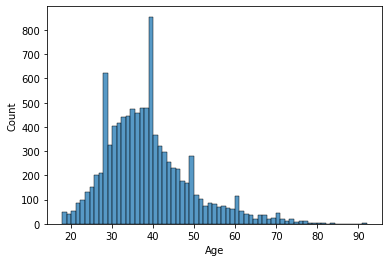

In [11]:
sb.histplot(data=df, x="Age");

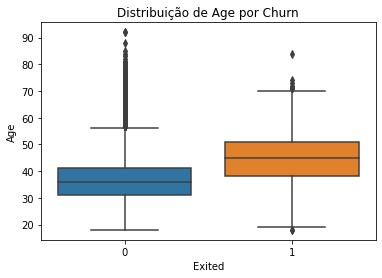

In [12]:
# Variável Age
sb.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribuição de Age por Churn')
plt.show()

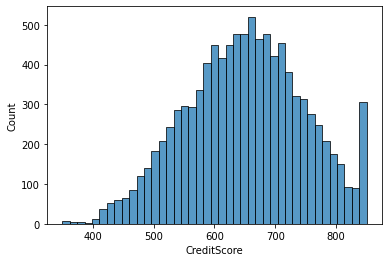

In [13]:
sb.histplot(data=df, x="CreditScore");

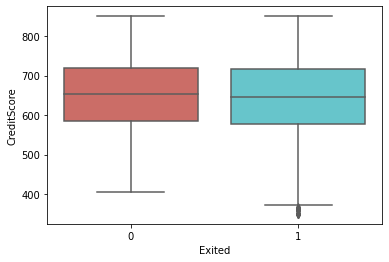

In [14]:
sb.boxplot(x='Exited', y='CreditScore', data=df, palette='hls');

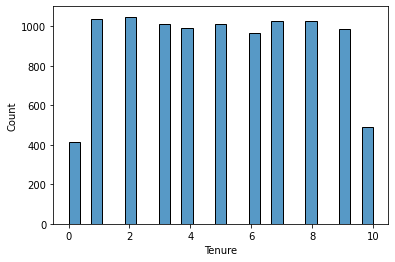

In [15]:
sb.histplot(data=df, x="Tenure");

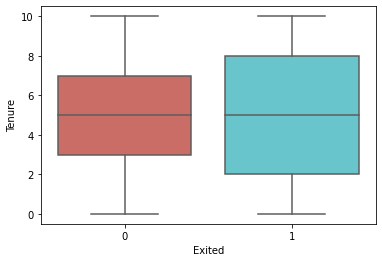

In [16]:
sb.boxplot(x='Exited', y='Tenure', data=df, palette='hls');

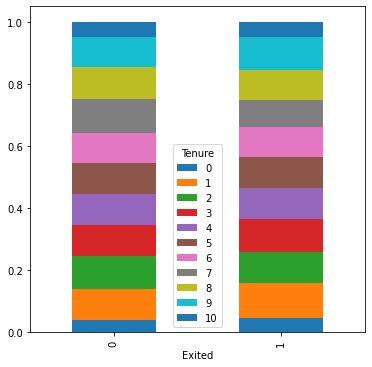

In [17]:
# comparison between HasCrCard and target

Tenure_cat = pd.crosstab(df['Exited'],df['Tenure'])
Tenure_cat.div(Tenure_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

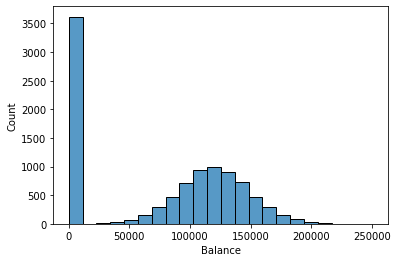

In [18]:
sb.histplot(data=df, x="Balance");

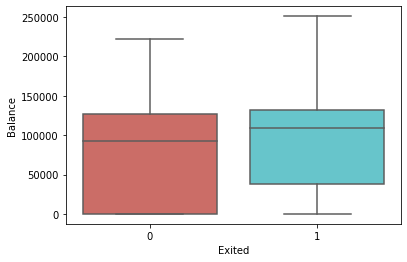

In [19]:
sb.boxplot(x='Exited', y='Balance', data=df, palette='hls');

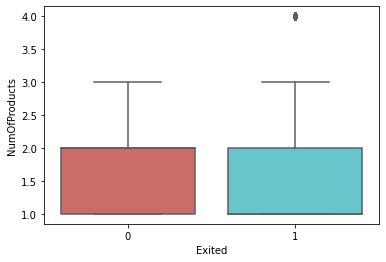

In [20]:
sb.boxplot(x='Exited', y='NumOfProducts', data=df, palette='hls');

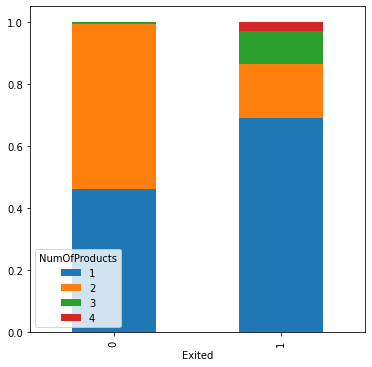

In [21]:
# comparison between NumOfProducts and target

NumOfProducts_cat = pd.crosstab(df['Exited'],df['NumOfProducts'])
NumOfProducts_cat.div(NumOfProducts_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

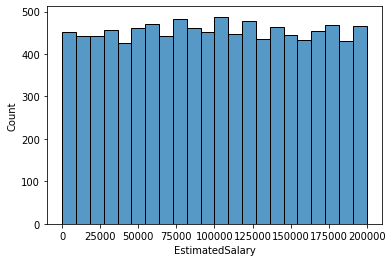

In [22]:
sb.histplot(data=df, x="EstimatedSalary");

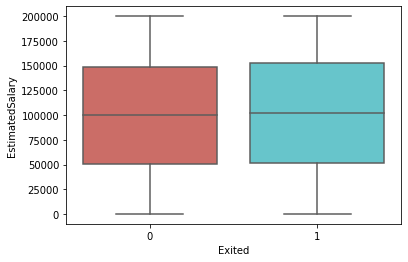

In [23]:
sb.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='hls');

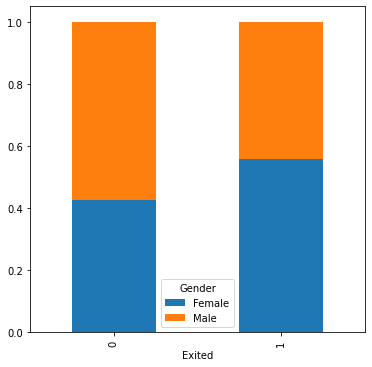

In [24]:
# comparison between Gender and target

Gender_cat = pd.crosstab(df['Exited'],df['Gender'])
Gender_cat.div(Gender_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

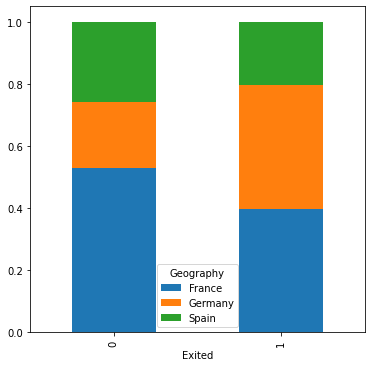

In [25]:
# comparison between Geography and target

Geography_cat = pd.crosstab(df['Exited'],df['Geography'])
Geography_cat.div(Geography_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

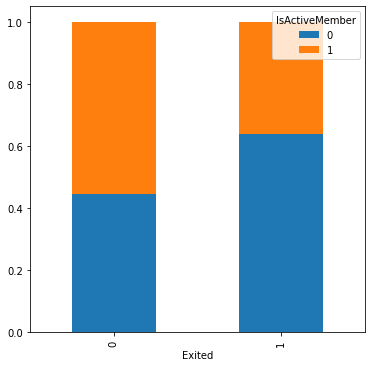

In [26]:
# comparison between IsActiveMember and target

IsActiveMember_cat = pd.crosstab(df['Exited'],df['IsActiveMember'])
IsActiveMember_cat.div(IsActiveMember_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

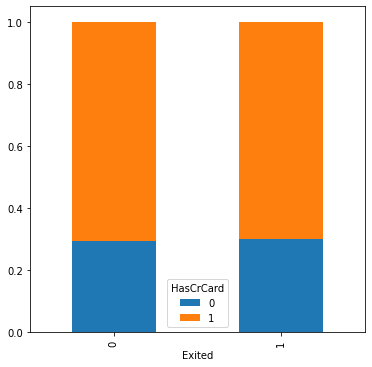

In [27]:
# comparison between HasCrCard and target

HasCrCard_cat = pd.crosstab(df['Exited'],df['HasCrCard'])
HasCrCard_cat.div(HasCrCard_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# uma opção 

# df['Balance'] = df['Balance'].astype(int)
# df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

df.info()

In [29]:
# transformando as variveis categoricas 

baseline_df =pd.get_dummies(df, drop_first=True)

print(baseline_df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

In [30]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [ ]:
# usando diferentes classificadores 
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento


In [31]:
X = baseline_df[baseline_df.columns.difference(['Exited'])].values

print(X[0])
y = baseline_df['Exited'].values
print(y)

[4.2000000e+01 0.0000000e+00 6.1900000e+02 1.0134888e+05 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 2.0000000e+00]
[1 0 1 ... 1 1 0]


In [32]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(baseline_df.drop('Exited',axis=1),baseline_df['Exited'],test_size=0.3, random_state=17)


In [33]:
X_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,7000.0,650.609571,97.104582,350.00,583.0000,652.000,718.000,850.00
Age,7000.0,38.866000,10.598616,18.00,32.0000,37.000,44.000,92.00
Tenure,7000.0,4.993286,2.895886,0.00,2.0000,5.000,7.000,10.00
Balance,7000.0,76096.896333,62619.261735,0.00,0.0000,96948.895,127646.945,250898.09
NumOfProducts,7000.0,1.530714,0.575913,1.00,1.0000,1.000,2.000,4.00
HasCrCard,7000.0,0.705571,0.455818,0.00,0.0000,1.000,1.000,1.00
IsActiveMember,7000.0,0.510000,0.499936,0.00,0.0000,1.000,1.000,1.00
EstimatedSalary,7000.0,100065.175640,57644.759376,11.58,50776.1175,99823.380,149600.760,199992.48
Geography_Germany,7000.0,0.250714,0.433455,0.00,0.0000,0.000,1.000,1.00
Geography_Spain,7000.0,0.247286,0.431465,0.00,0.0000,0.000,0.000,1.00


In [34]:
X_treino.shape, y_treino.shape

((7000, 11), (7000,))

In [35]:
# Feature Scaling 
# Only on Independent Variable 

from sklearn.preprocessing import MinMaxScaler

cols = X_treino.columns

MinMax = MinMaxScaler()
X_treino = MinMax.fit_transform(X_treino)
X_teste = MinMax.fit_transform(X_teste)
X_treino = pd.DataFrame(X_treino, columns=[cols])
X_treino.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.374,0.108108,0.7,0.424068,0.000000,0.0,0.0,0.517808,0.0,0.0,1.0
1,0.526,0.310811,0.7,0.000000,0.333333,1.0,0.0,0.301459,0.0,0.0,1.0
2,0.468,0.243243,0.9,0.000000,0.000000,1.0,1.0,0.529085,0.0,0.0,1.0
3,0.492,0.283784,1.0,0.344946,0.000000,0.0,1.0,0.658850,0.0,0.0,0.0
4,0.658,0.567568,0.6,0.000000,0.333333,1.0,1.0,0.386638,0.0,0.0,1.0


## Voting Ensemble

In [36]:
# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# Documentação de referência: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

from sklearn.ensemble import VotingClassifier



In [37]:
knn = KNeighborsClassifier(n_neighbors = 5)
decision_tree = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=100)
nbCat = CategoricalNB()
svm = LinearSVC(max_iter=5000)
nbGau = GaussianNB()

voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree), ('knn', knn), ('nb', nbGau), ('svm', svm)], 
    n_jobs=-1)

voting_clf.fit(X_treino, y_treino)


#voting{‘hard’, ‘soft’}, default=’hard’
# If ‘hard’, uses predicted class labels for majority rule voting.
# Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities,
# which is recommended for an ensemble of well-calibrated classifiers.

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_split=100)),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB()),
                             ('svm', LinearSVC(max_iter=5000))],
                 n_jobs=-1)

In [38]:
from sklearn.metrics import accuracy_score

for clf in (decision_tree, knn,  nbGau, svm , voting_clf):
  clf.fit(X_treino, y_treino)
  y_predito = clf.predict(X_teste)
  acuracia = accuracy_score(y_teste, y_predito)
  print("Classificador {} tem acurácia de {}".format(clf.__class__.__name__, acuracia))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Classificador DecisionTreeClassifier tem acurácia de 0.8376666666666667
Classificador KNeighborsClassifier tem acurácia de 0.8196666666666667
Classificador GaussianNB tem acurácia de 0.8193333333333334
Classificador LinearSVC tem acurácia de 0.8063333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Classificador VotingClassifier tem acurácia de 0.83


In [39]:
# importância das variáveis na árvore de decisão

for feature,importancia in zip(X_treino.columns,decision_tree.feature_importances_):
    print("{}:{}".format(feature, importancia))

('CreditScore',):0.0
('Age',):0.4809668672625623
('Tenure',):0.0
('Balance',):0.017086622787158022
('NumOfProducts',):0.31790896796136264
('HasCrCard',):0.0
('IsActiveMember',):0.18403754198891709
('EstimatedSalary',):0.0
('Geography_Germany',):0.0
('Geography_Spain',):0.0
('Gender_Male',):0.0


## Bagging (Bootstrap aggregation)

In [40]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(splitter='random'), n_estimators=500, max_samples=300, )
bagging.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


BaggingClassifier(base_estimator=DecisionTreeClassifier(splitter='random'),
                  max_samples=300, n_estimators=500)

In [41]:
y_predito = bagging.predict(X_teste)
accuracy_score(y_teste, y_predito)

0.8573333333333333

In [42]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix


array([[2275,  112],
       [ 316,  297]])

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2387
           1       0.73      0.48      0.58       613

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



## Random Forests

In [44]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_depth=4, min_samples_split=100, random_state=17, n_jobs=-1)
random_forest.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=4, min_samples_split=100, n_estimators=500,
                       n_jobs=-1, random_state=17)

In [45]:
y_predito = random_forest.predict(X_teste)
accuracy_score(y_teste, y_predito)

0.8396666666666667

In [46]:
for caracteristica, score in zip(X_treino, random_forest.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))

caracteristica ('CreditScore',) e Importância 2.3838750163491884
caracteristica ('Age',) e Importância 38.33267145280323
caracteristica ('Tenure',) e Importância 0.2153484100296398
caracteristica ('Balance',) e Importância 4.748256376508023
caracteristica ('NumOfProducts',) e Importância 33.383684382047704
caracteristica ('HasCrCard',) e Importância 0.046315968344057774
caracteristica ('IsActiveMember',) e Importância 10.98925838933609
caracteristica ('EstimatedSalary',) e Importância 0.5874070540738007
caracteristica ('Geography_Germany',) e Importância 7.671785770575459
caracteristica ('Geography_Spain',) e Importância 0.19208704468286997
caracteristica ('Gender_Male',) e Importância 1.449310135249933


In [47]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

array([[2356,   31],
       [ 450,  163]])

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2387
           1       0.84      0.27      0.40       613

    accuracy                           0.84      3000
   macro avg       0.84      0.63      0.66      3000
weighted avg       0.84      0.84      0.80      3000



## Boosting : AdaBoost 

In [49]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, learning_rate=0.7, random_state=17)
ada_boost.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.7, n_estimators=500, random_state=17)

n_estimatorsint, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).


learning_ratefloat, default=1.0
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

In [50]:
y_predito = ada_boost.predict(X_teste)
accuracy_score(y_teste, y_predito)

0.826

In [51]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

array([[2195,  192],
       [ 330,  283]])

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2387
           1       0.60      0.46      0.52       613

    accuracy                           0.83      3000
   macro avg       0.73      0.69      0.71      3000
weighted avg       0.81      0.83      0.82      3000



## Gradient Boosting

In [53]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier



In [54]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GradientBoostingClassifier()

In [55]:
y_predito = gradient_boost.predict(X_teste)
accuracy_score(y_teste, y_predito)

0.855

In [56]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

array([[2249,  138],
       [ 297,  316]])

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2387
           1       0.70      0.52      0.59       613

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.85      0.85      0.85      3000



In [58]:
for caracteristica, score in zip(X_treino, gradient_boost.feature_importances_):
  print('caracteristica {} e Importância {}'.format(caracteristica, score*100))



caracteristica ('CreditScore',) e Importância 2.752348923502665
caracteristica ('Age',) e Importância 38.330917158578934
caracteristica ('Tenure',) e Importância 0.37517887933860267
caracteristica ('Balance',) e Importância 9.758060806207675
caracteristica ('NumOfProducts',) e Importância 28.138911656233596
caracteristica ('HasCrCard',) e Importância 0.05136395490977936
caracteristica ('IsActiveMember',) e Importância 12.951271211161327
caracteristica ('EstimatedSalary',) e Importância 1.256602147644792
caracteristica ('Geography_Germany',) e Importância 5.180420008292681
caracteristica ('Geography_Spain',) e Importância 0.031159700643235057
caracteristica ('Gender_Male',) e Importância 1.1737655534867086


## XGBoost (Extreme Gradient Boosting)

In [ ]:
# Documentação sobre XGBoost https://xgboost.readthedocs.io/en/stable/index.html

!pip install  xgboost

In [ ]:
import warnings
warnings.simplefilter('ignore')
# Import XGBoost
import xgboost
# XGBoost Classifier
from xgboost import XGBClassifier

In [ ]:
X_treino

In [ ]:

xgb = xgboost.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.01, n_jobs=-1)
bst = xgb.fit(X_treino, y_treino)



In [ ]:
y_predito = xgb.predict(X_teste)
accuracy_score(y_teste, y_predito)

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_teste, y_predito)
confusion_matrix

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0', '1'])
disp.plot();



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_predito))

# Resultado do classification_report:

In [ ]:
y_predito

In [ ]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(xgb, X_treino, y_treino, scoring='accuracy', cv=10)
print(scores_dt.mean())

In [ ]:
from xgboost import plot_importance
    
# Plot feature importance
plot_importance(xgb);

In [ ]:
 # fazendo de outra forma:

In [ ]:
feature_important = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())



In [ ]:
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features